# Polynomial Regression

In [2]:
import numpy as np 
import pandas as pd
from pandas import read_csv
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [3]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
x = data.iloc[:,:13]
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [5]:
y = data['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [8]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666.0,20.2,109.85,23.27


In [9]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666.0,20.2,28.79,34.37
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666.0,20.2,27.49,18.05
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666.0,20.2,35.05,21.22
86,0.05188,0.0,4.49,0,0.449,6.015,45.1,4.4272,3,247.0,18.5,395.99,12.86


In [10]:
y_train

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: MEDV, Length: 404, dtype: float64

In [11]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: MEDV, Length: 102, dtype: float64

In [12]:
x_train.shape, x_test.shape

((404, 13), (102, 13))

In [13]:
y_train.shape, y_test.shape

((404,), (102,))

In [20]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [25]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [27]:
y_pred_train

array([10.96952405, 19.41196567, 23.06419602, 12.1470648 , 18.3738116 ,
       25.24677946, 20.77024774, 23.90932632,  7.81713319, 19.60988098,
       21.8202963 , 27.59615864, 32.67986504, 15.12308446, 35.3964561 ,
       12.99688651, 20.728181  , 28.30223542, 15.61724836, 24.45143096,
        4.61794591, 23.76681932, 25.56178249, 22.98928526, 24.5213025 ,
       34.06407919, 19.71166707, 39.11233072, 14.62515846, 24.81139885,
       18.02332883, 20.85836445,  9.57577261, 20.87246835, 22.28583096,
       31.79327155, 31.04748307, 15.70611763, 17.01382935, 28.23332703,
       24.27661276, 16.88670215,  6.90720745, 26.75808901, 22.586493  ,
       17.53664716, 13.77197016, 41.04840929, 16.44690754, 18.23531669,
       25.37038646, 23.64581399, 22.05322581, 20.83620499, 16.93508273,
       22.797579  , 29.13333934,  7.69310515, 24.60571452, 17.2358028 ,
       21.10846551, 25.15150324, 27.33394823, 21.30494963, 41.5811902 ,
       19.19666651, 15.37955448, 19.33545877, 17.04687638, 22.96

In [28]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: MEDV, Length: 102, dtype: float64

In [29]:
y_pred_test

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [31]:
mean_squared_error(y_train,y_pred_train)

21.641412753226316

In [32]:
np.sqrt(mean_squared_error(y_train,y_pred_train))

4.6520331848801675

In [33]:
mean_absolute_error(y_train,y_pred_train)

3.314771626783233

In [34]:
r2_score(y_train,y_pred_train)

0.7508856358979672

In [36]:
def training_evaluation(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)

    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'ACCURACY: {r2}')

In [37]:
training_evaluation(y_train,y_pred_train)

MSE: 21.641412753226316
RMSE: 4.6520331848801675
MAE: 3.314771626783233
ACCURACY: 0.7508856358979672


In [38]:
def test_evaluation(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)

    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'ACCURACY: {r2}')

In [39]:
test_evaluation(y_test, y_pred_test)


MSE: 24.29111947497374
RMSE: 4.928602182665359
MAE: 3.189091965887874
ACCURACY: 0.6687594935356289


## polynomial regression

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

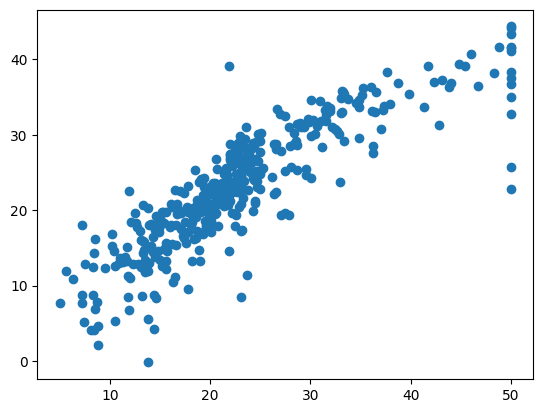

In [42]:
plt.scatter(y_train, y_pred_train)

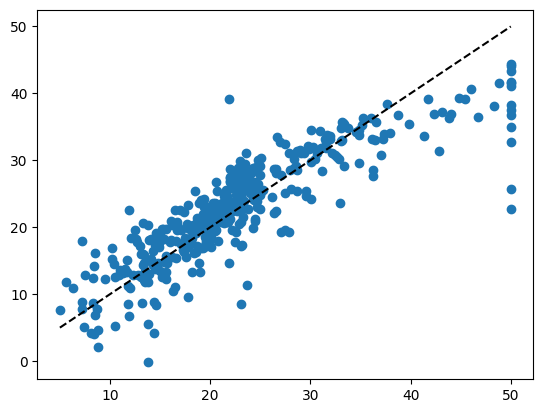

In [45]:
plt.scatter(y_train, y_pred_train)
plt.plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()], 'k--')

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
poly_features = PolynomialFeatures()
poly_features

PolynomialFeatures()

In [51]:
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

In [52]:
x_train_poly

array([[1.00000000e+00, 1.50234000e+01, 0.00000000e+00, ...,
        1.22136270e+05, 8.70554680e+03, 6.20508100e+02],
       [1.00000000e+00, 6.27390000e-01, 0.00000000e+00, ...,
        1.56515184e+05, 3.35090140e+03, 7.17409000e+01],
       [1.00000000e+00, 3.46600000e-02, 3.50000000e+01, ...,
        1.31225062e+05, 2.83641750e+03, 6.13089000e+01],
       ...,
       [1.00000000e+00, 1.50100000e-02, 8.00000000e+01, ...,
        1.52834084e+05, 2.34173060e+03, 3.58801000e+01],
       [1.00000000e+00, 1.11604000e+01, 0.00000000e+00, ...,
        1.20670225e+04, 2.55620950e+03, 5.41492900e+02],
       [1.00000000e+00, 2.28760000e-01, 0.00000000e+00, ...,
        5.01264000e+03, 7.52604000e+02, 1.12996900e+02]])

In [53]:
x_test_poly

array([[1.00000000e+00, 9.17800000e-02, 0.00000000e+00, ...,
        1.56420250e+05, 3.57532000e+03, 8.17216000e+01],
       [1.00000000e+00, 5.64400000e-02, 4.00000000e+01, ...,
        1.57529610e+05, 1.40105700e+03, 1.24609000e+01],
       [1.00000000e+00, 1.05740000e-01, 0.00000000e+00, ...,
        1.52185812e+05, 7.04928770e+03, 3.26524900e+02],
       ...,
       [1.00000000e+00, 1.40507000e+01, 0.00000000e+00, ...,
        1.22850250e+03, 7.43761000e+02, 4.50288400e+02],
       [1.00000000e+00, 5.18800000e-02, 0.00000000e+00, ...,
        1.56808080e+05, 5.09243140e+03, 1.65379600e+02],
       [1.00000000e+00, 9.51200000e-02, 0.00000000e+00, ...,
        1.46865233e+05, 3.42607620e+03, 7.99236000e+01]])

In [55]:
poly = LinearRegression()
poly.fit(x_train_poly, y_train)

LinearRegression()

In [60]:
y_pred_train_poly = poly.predict(x_train_poly)
y_pred_test_poly = poly.predict(x_test_poly)

In [62]:
y_train

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: MEDV, Length: 404, dtype: float64

In [58]:
y_pred_train

array([10.96952405, 19.41196567, 23.06419602, 12.1470648 , 18.3738116 ,
       25.24677946, 20.77024774, 23.90932632,  7.81713319, 19.60988098,
       21.8202963 , 27.59615864, 32.67986504, 15.12308446, 35.3964561 ,
       12.99688651, 20.728181  , 28.30223542, 15.61724836, 24.45143096,
        4.61794591, 23.76681932, 25.56178249, 22.98928526, 24.5213025 ,
       34.06407919, 19.71166707, 39.11233072, 14.62515846, 24.81139885,
       18.02332883, 20.85836445,  9.57577261, 20.87246835, 22.28583096,
       31.79327155, 31.04748307, 15.70611763, 17.01382935, 28.23332703,
       24.27661276, 16.88670215,  6.90720745, 26.75808901, 22.586493  ,
       17.53664716, 13.77197016, 41.04840929, 16.44690754, 18.23531669,
       25.37038646, 23.64581399, 22.05322581, 20.83620499, 16.93508273,
       22.797579  , 29.13333934,  7.69310515, 24.60571452, 17.2358028 ,
       21.10846551, 25.15150324, 27.33394823, 21.30494963, 41.5811902 ,
       19.19666651, 15.37955448, 19.33545877, 17.04687638, 22.96

In [63]:
y_pred_train_poly

array([11.82400441, 19.0172894 , 19.09960234,  9.8483659 , 18.39123952,
       25.72511792, 21.80463558, 25.01298153,  7.24112207, 20.52052736,
       23.0424543 , 29.56342381, 32.26987344, 14.93273866, 40.07505095,
       13.63839555, 21.37682158, 25.72965372, 17.58628023, 24.40985602,
        7.26861018, 19.51259536, 23.76378524, 22.03119397, 23.24806678,
       34.95337987, 14.62866074, 45.73702449, 15.90873259, 23.78192788,
       16.86045128, 14.0357703 , 14.45988083, 20.93177128, 21.45497519,
       30.01066512, 29.96668905, 16.01391041, 17.52678311, 24.1624139 ,
       17.6989705 , 18.07967252, 11.30398786, 22.57578868, 14.60406822,
       10.72827411, 15.50315714, 47.9997983 , 16.42183679, 13.49087524,
       25.41715592, 20.46848661, 19.97302872, 20.65811199, 14.55068135,
       25.79913884, 30.78516591,  1.18223715, 27.04175454, 18.54376388,
       24.09796584, 24.00387067, 23.53618878, 19.70894307, 48.45023602,
       16.28661209, 15.76305318, 17.94137418, 21.98835367, 21.02

In [64]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: MEDV, Length: 102, dtype: float64

In [65]:
y_pred_test

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

In [66]:
y_pred_test_poly

array([26.83685917, 33.41468239, 14.74525523, 19.92137456, 16.58280182,
       15.77617931, 16.96196896, 13.73813021, 23.00860775, 19.16118419,
       19.59337425, 21.14624655, 16.76521581, 16.40286183, 18.64572245,
       25.55360603, 18.81057274,  9.42694944, 49.67675275, 13.18055302,
       25.19258428, 28.14872718, 15.91599506, 19.09101027, 18.12599283,
       18.29626578, 16.69109631, 13.49139214, 17.56281209, 19.04295653,
       20.39399892, 24.37610179, 19.77178341, 26.72554451, 15.20120168,
       18.04763144, 31.06727362, 20.50282621, 21.2198326 , 21.14753914,
       16.90254694, 31.94222802, 52.26858687, 14.79016453, 26.6058107 ,
       17.32604206, 15.75328982, 23.30047375, 19.24561256, 28.38883466,
       21.77625185, 37.0047797 , 17.76573622, 26.34315944, 46.15440738,
       25.11233509, 15.70247626, 32.03887177, 25.25753605, 16.42985308,
       24.6883108 , 28.73852962, 30.68180168, 11.42682147, 25.26887339,
       16.93731844, 15.45697409, 24.68138576, 30.11929929, 12.82

In [ ]:
def training_evaluation(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)

    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'ACCURACY: {r2}')

In [67]:
training_evaluation(y_train,y_pred_train_poly)

MSE: 5.626164347845584
RMSE: 2.371953698503743
MAE: 1.8395270966952388
ACCURACY: 0.9352372060997665


In [ ]:
def test_evaluation(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)

    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'ACCURACY: {r2}')

In [68]:
test_evaluation(y_test, y_pred_test_poly)

MSE: 14.566436078287808
RMSE: 3.8166000678991514
MAE: 2.6431288665416184
ACCURACY: 0.8013679991601887


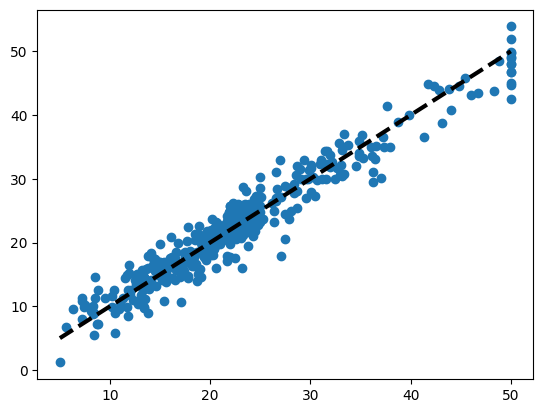

In [72]:
plt.scatter(y_train, y_pred_train_poly)
plt.plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()], 'k--',lw=3)

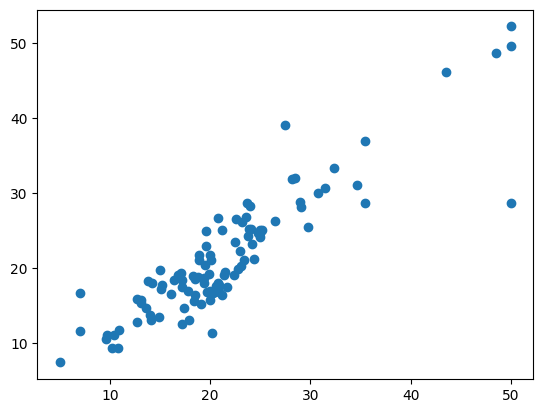

In [69]:
plt.scatter(y_test, y_pred_test_poly)